In [22]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo import spa

# dimensions 
d = 64
n = 50*d

# class for delayed connection
delay_t = 0.2   # 200 ms pro Silbe

class Delay(object):
    def __init__(self, dimensions, timesteps=50):
        self.timesteps = timesteps
        self.dimensions = dimensions
        self.history = None
        self.reset()
    def step(self, t, x):
        self.history = np.roll(self.history, -self.dimensions)
        self.history[-1] = x
        return self.history[0]
    def reset(self):
        self.history = np.zeros((self.timesteps, self.dimensions))

dt = 0.001
delay = Delay(dimensions=d, timesteps=int(delay_t / dt))

# SPA-Model: 
model = spa.SPA()
with model:
    # --------------------- SPA representations ----------------
    
    # High level SPs
    model.visual   = spa.Buffer(dimensions=d)
    model.phonemic = spa.Buffer(dimensions=d)
    model.premotor = spa.Buffer(dimensions=d)
    model.audiexpect = spa.Buffer(dimensions=d)
    model.motor  = spa.Buffer(dimensions=d)
    model.motor1 = nengo.Ensemble(n, dimensions=d)
    model.motor2 = nengo.Ensemble(n, dimensions=d)
    model.somato = spa.Buffer(dimensions=d)

    model.delaynode = nengo.Node(delay.step, size_in=d, size_out=d)
    
    # High level routing
    actions = spa.Actions(
        'dot(visual, BA) --> phonemic=BA',
        '0.2 --> phonemic=NEUTRAL, premotor=NEUTRAL, audiexpect=NEUTRAL, motor=NEUTRAL',
        'dot(phonemic, BA) --> premotor=BA, motor=BA_EXEC, audiexpect=BA',
        'dot(phonemic, DA) --> premotor=DA, motor=DA_EXEC, audiexpect=DA',
        'dot(phonemic, GA) --> premotor=GA, motor=GA_EXEC, audiexpect=GA',
        'dot(phonemic, PA) --> premotor=PA, motor=PA_EXEC, audiexpect=PA',
        'dot(phonemic, TA) --> premotor=TA, motor=TA_EXEC, audiexpect=TA',
        'dot(phonemic, KA) --> premotor=KA, motor=KA_EXEC, audiexpect=KA',
        #'dot(phonemic, BI) --> premotor=BI, motor=BI_EXEC, audiexpect=BI',
        #'dot(phonemic, DI) --> premotor=DI, motor=DI_EXEC, audiexpect=DI',
        #'dot(phonemic, GI) --> premotor=GI, motor=GI_EXEC, audiexpect=GI',
        #'dot(phonemic, PI) --> premotor=PI, motor=PI_EXEC, audiexpect=PI',
        #'dot(phonemic, TI) --> premotor=TI, motor=TI_EXEC, audiexpect=TI',
        #'dot(phonemic, KI) --> premotor=KI, motor=KI_EXEC, audiexpect=KI',
        #'dot(phonemic, BU) --> premotor=BU, motor=BU_EXEC, audiexpect=BU',
        #'dot(phonemic, DU) --> premotor=DU, motor=DU_EXEC, audiexpect=DU',
        #'dot(phonemic, GU) --> premotor=GU, motor=GU_EXEC, audiexpect=GU',
        #'dot(phonemic, PU) --> premotor=PU, motor=PU_EXEC, audiexpect=PU',
        #'dot(phonemic, TU) --> premotor=TU, motor=TU_EXEC, audiexpect=TU',
        #'dot(phonemic, KU) --> premotor=KU, motor=KU_EXEC, audiexpect=KU',
        #'dot(phonemic, BE) --> premotor=BE, motor=BE_EXEC, audiexpect=BE',
        #'dot(phonemic, DE) --> premotor=DE, motor=DE_EXEC, audiexpect=DE',
        #'dot(phonemic, GE) --> premotor=GE, motor=GE_EXEC, audiexpect=GE',
        #'dot(phonemic, PE) --> premotor=PE, motor=PE_EXEC, audiexpect=PE',
        #'dot(phonemic, TE) --> premotor=TE, motor=TE_EXEC, audiexpect=TE',
        #'dot(phonemic, KE) --> premotor=KE, motor=KE_EXEC, audiexpect=KE',
        #'dot(phonemic, BO) --> premotor=BO, motor=BO_EXEC, audiexpect=BO',
        #'dot(phonemic, DO) --> premotor=DO, motor=DO_EXEC, audiexpect=DO',
        #'dot(phonemic, GO) --> premotor=GO, motor=GO_EXEC, audiexpect=GO',
        #'dot(phonemic, PO) --> premotor=PO, motor=PO_EXEC, audiexpect=PO',
        #'dot(phonemic, TO) --> premotor=TO, motor=TO_EXEC, audiexpect=TO',
        #'dot(phonemic, KO) --> premotor=KO, motor=KO_EXEC, audiexpect=KO',
        'dot(somato, BA_EXEC) --> phonemic=DA',   
        'dot(somato, DA_EXEC) --> phonemic=GA',  
        'dot(somato, GA_EXEC) --> phonemic=PA',  
        'dot(somato, PA_EXEC) --> phonemic=TA',   
        'dot(somato, TA_EXEC) --> phonemic=KA',  
        'dot(somato, KA_EXEC) --> phonemic=BA',  
        #'dot(somato, BI_EXEC) --> phonemic=DI',   
        #'dot(somato, DI_EXEC) --> phonemic=GI',  
        #'dot(somato, GI_EXEC) --> phonemic=PI',  
        #'dot(somato, PI_EXEC) --> phonemic=TI',   
        #'dot(somato, TI_EXEC) --> phonemic=KI',  
        #'dot(somato, KI_EXEC) --> phonemic=BU',  
        #'dot(somato, BU_EXEC) --> phonemic=DU',   
        #'dot(somato, DU_EXEC) --> phonemic=GU',  
        #'dot(somato, GU_EXEC) --> phonemic=PU',  
        #'dot(somato, PU_EXEC) --> phonemic=TU',   
        #'dot(somato, TU_EXEC) --> phonemic=KU',  
        #'dot(somato, KU_EXEC) --> phonemic=BE',  
        #'dot(somato, BE_EXEC) --> phonemic=DE',   
        #'dot(somato, DE_EXEC) --> phonemic=GE',  
        #'dot(somato, GE_EXEC) --> phonemic=PE',  
        #'dot(somato, PE_EXEC) --> phonemic=TE',   
        #'dot(somato, TE_EXEC) --> phonemic=KE',  
        #'dot(somato, KE_EXEC) --> phonemic=BO',  
        #'dot(somato, BO_EXEC) --> phonemic=DO',   
        #'dot(somato, DO_EXEC) --> phonemic=GO',  
        #'dot(somato, GO_EXEC) --> phonemic=PO',  
        #'dot(somato, PO_EXEC) --> phonemic=TO',   
        #'dot(somato, TO_EXEC) --> phonemic=KO',  
        #'dot(somato, KO_EXEC) --> phonemic=BA',  
    )
    nengo.networks.actionselection.Weights.lg = 0.02
    nengo.networks.actionselection.Weights.le = 0.02
    nengo.networks.actionselection.Weights.wt = 1.0
    nengo.networks.actionselection.Weights.wp = 0.9
    nengo.networks.actionselection.Weights.wp_snr = 0.9 # not used yet
        
    model.bg = spa.BasalGanglia(actions)
    model.thalamus = spa.Thalamus(model.bg)
    
    # model delay:
    nengo.Connection(model.motor.state.output, model.motor1, synapse=0.01)
    
    # no delay:
    #nengo.Connection(model.motor1, model.motor2, synapse=0.01)
    
    # delay: 
    nengo.Connection(model.motor1, model.delaynode)
    nengo.Connection(model.delaynode, model.motor2)
    
    nengo.Connection(model.motor2, model.somato.state.input, synapse=0.01)

    # Provide input to high-level
    def start(t):
        if t < 0.25: 
            return 'ZERO'
        elif t < 0.45:
            return 'BA'
        else:
            return 'ZERO'

    model.input = spa.Input(visual=start)
    
    # set up probes
    visual   = nengo.Probe(model.visual.state.output, synapse=0.03)
    phonemic = nengo.Probe(model.phonemic.state.output, synapse=0.03)
    premotor = nengo.Probe(model.premotor.state.output, synapse=0.03)
    audiexpect = nengo.Probe(model.audiexpect.state.output, synapse=0.03)
    motor = nengo.Probe(model.motor.state.output, synapse=0.03)
    somato = nengo.Probe(model.somato.state.output, synapse=0.03)

# The premotor ba da ga SPs should give the information concerning all premotor parameters???
# for: targets, execution velocity of point attractors, time delay for starting a point attractor


/usr/local/lib/python3.7/site-packages/nengo/spa/vocab.py:121: UserWarning: Could not create a semantic pointer with max_similarity=0.10 (D=64, M=13)
  % (self.max_similarity, self.dimensions, len(self.pointers))


In [23]:
# run simulation
sim = nengo.Simulator(model)
sim.run(6)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

/usr/local/lib/python3.7/site-packages/nengo/builder/builder.py:233: UserWarning: Object <BasalGanglia "bg"> has already been built.
  warnings.warn("Object %s has already been built." % obj)
/usr/local/lib/python3.7/site-packages/nengo/builder/builder.py:233: UserWarning: Object <Thalamus "thalamus"> has already been built.
  warnings.warn("Object %s has already been built." % obj)


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

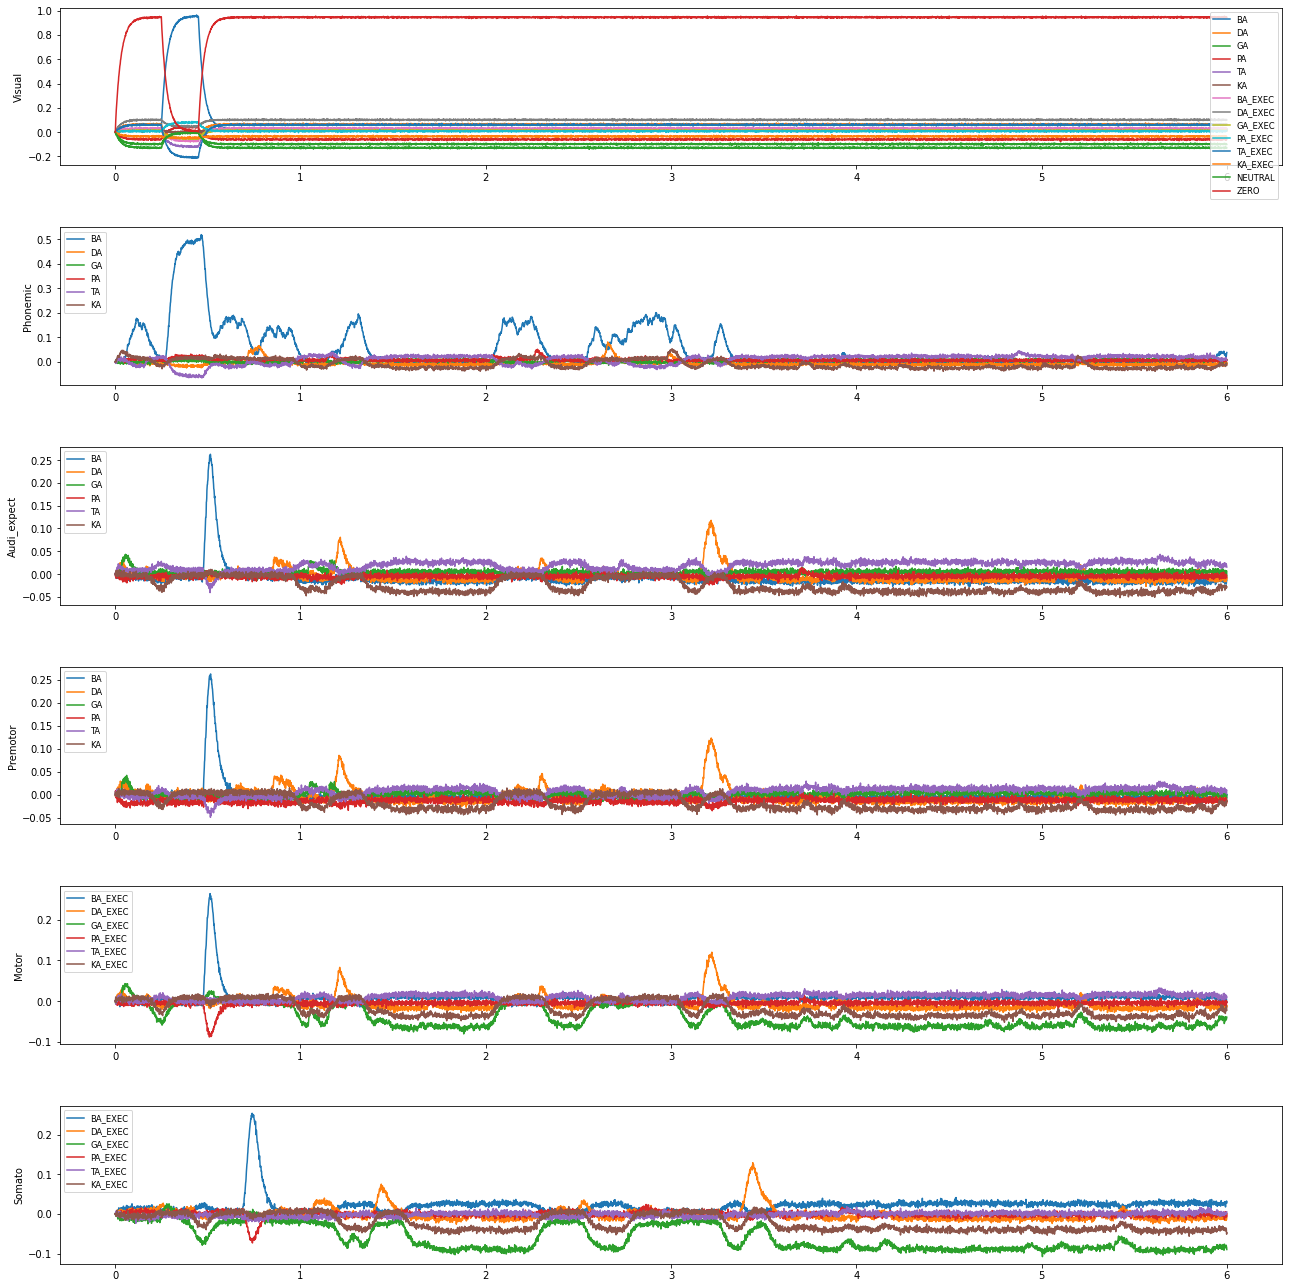

In [24]:
# ------------------------------- Plot data ----------------------------------
# inline plotting: 
#%matplotlib inline
#plt.figure()

plt.figure(figsize=(18, 18))
plt.subplot(6, 1, 1)
plt.plot(sim.trange(), model.similarity(sim.data, visual))
plt.legend(model.get_input_vocab('visual').keys, fontsize='small',loc=1)
plt.ylabel('Visual')
plt.subplot(6, 1, 2)
phonemic_want=model.similarity(sim.data, phonemic)
phonemic_want=phonemic_want[:,:6]
plt.plot(sim.trange(),phonemic_want )
plt.legend(model.get_input_vocab('phonemic').keys[:6], fontsize='small',loc=2)
plt.ylabel('Phonemic')
plt.subplot(6, 1, 3)
audi_want=model.similarity(sim.data, audiexpect)
audi_want=audi_want[:,:6]
plt.plot(sim.trange(),audi_want )
plt.legend(model.get_input_vocab('audiexpect').keys[:6], fontsize='small',loc=2)
plt.ylabel('Audi_expect')
plt.subplot(6, 1, 4)

premotor_want=model.similarity(sim.data, premotor)
premotor_want=premotor_want[:,:6]
plt.plot(sim.trange(), premotor_want)
plt.legend(model.get_input_vocab('premotor').keys[:6], fontsize='small',loc=2)
plt.ylabel('Premotor')
plt.subplot(6, 1, 5)

motor_want= model.similarity(sim.data, motor)
motor_want=motor_want[:,6:12]
plt.plot(sim.trange(),motor_want)
plt.legend(model.get_input_vocab('motor').keys[6:12], fontsize='small',loc=2)
plt.ylabel('Motor')
plt.subplot(6, 1, 6)
somato_want=model.similarity(sim.data, somato)
somato_want=somato_want[:,6:12]
plt.plot(sim.trange(), somato_want)
plt.legend(model.get_input_vocab('somato').keys[6:12], fontsize='small',loc=2)
plt.ylabel('Somato')
plt.tight_layout()
#external plotting: 
plt.show()

In [4]:
print(model.get_input_vocab('phonemic').keys)

['BA', 'DA', 'GA', 'PA', 'TA', 'KA', 'BA_EXEC', 'DA_EXEC', 'GA_EXEC', 'PA_EXEC', 'TA_EXEC', 'KA_EXEC', 'NEUTRAL', 'ZERO']


In [5]:
print(sim.trange())

[1.000e-03 2.000e-03 3.000e-03 ... 5.998e+00 5.999e+00 6.000e+00]


In [6]:
model.similarity(sim.data, somato).shape

(6000, 14)

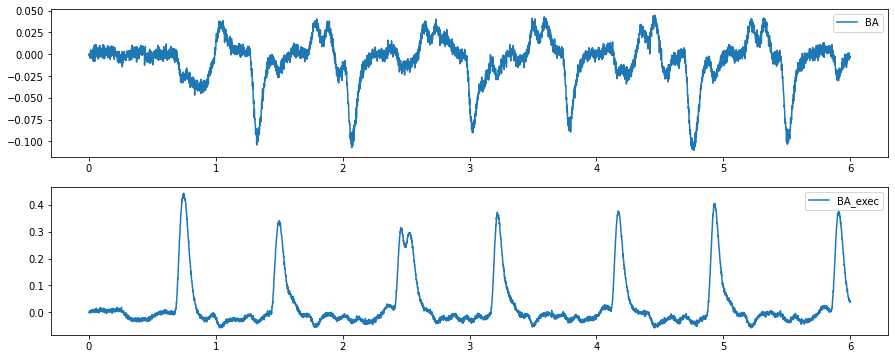

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), model.similarity(sim.data, somato)[:,0],label="BA")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(sim.trange(), model.similarity(sim.data, somato)[:,6],label="BA_exec")
plt.legend()

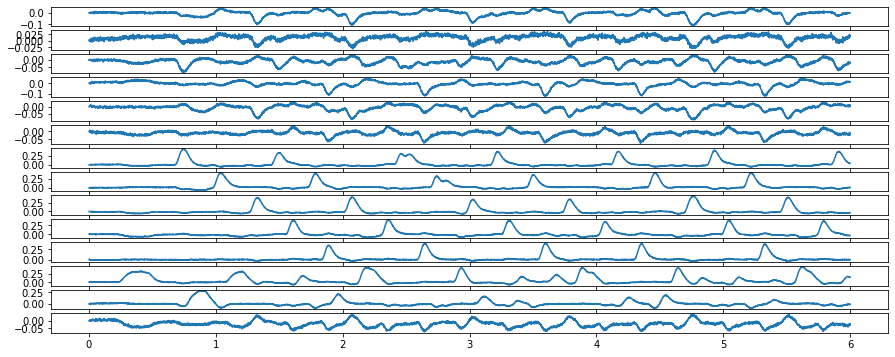

In [8]:
phonemic_data=model.similarity(sim.data, somato)
fig, axs = plt.subplots(14,1, figsize=(15, 6))
axs = axs.ravel()
for i in range(14):
    idx=i
    phonemic_6=phonemic_data[:,idx]
    axs[i].plot(sim.trange(),phonemic_6)